# How Many Clicks Away from the Homunculus?



In [3]:
import json
import networkx as nx
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15, 15))

from jsoncache import printf

with open("datasets/random100.json") as hist:
    data = json.load(hist)

paths = {d["start"]: min(d["paths"], key=len) for d in data.values()}
pL = [len(p) - 1 for p in paths.values()]


graph_map = []
for key, vals in paths.items():
    for i, v in enumerate(vals):
        if i < len(vals) -1:
            graph_map += [(vals[i], vals[i+1])]
            
            
printf("Avg: %.2f", sum(pL) / len(pL))
printf("Max: %d, Min: %d", max(pL), min(pL))

Avg: 3.94
Max: 5, Min: 3


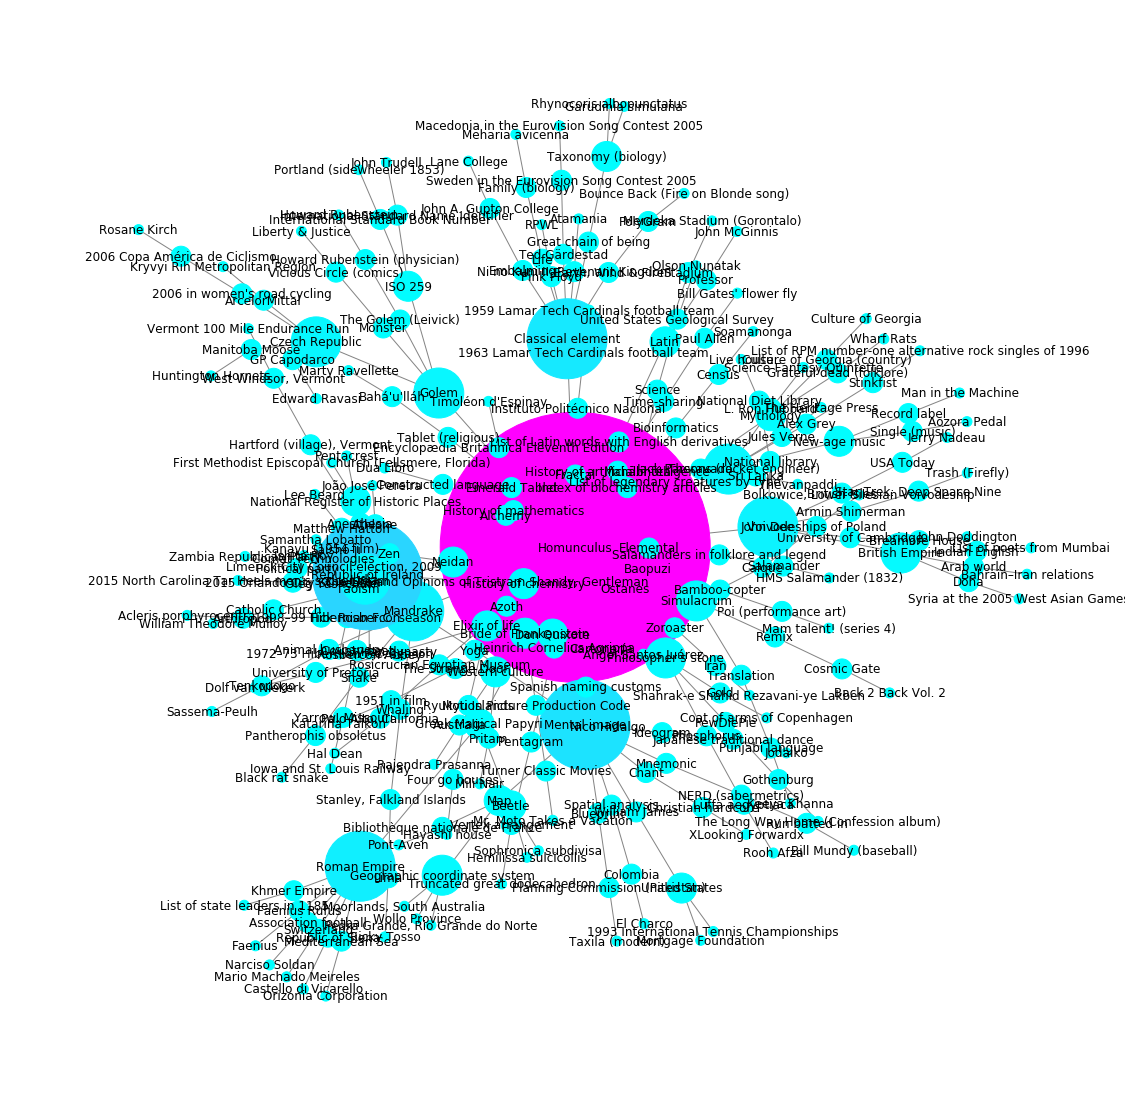

In [4]:
def plot_graph(graph_map):
    G = nx.Graph()
    G.add_edges_from(sorted(graph_map))
    d = nx.degree(G)
    ds = list(zip(*d))
    # print(ds)
    pos = nx.spring_layout(G)
    colors = range(G.number_of_edges())
    colors2 = [d * d for d in ds[1]]
    nx.draw(G, pos, 
            edge_color="#848484",
            node_list=ds[0],
            node_size=[d * d * 100 for d in ds[1]], 
            node_color=colors2, 
            width=1, cmap=plt.cm.cool, with_labels=True)
    plt.show()
    
plot_graph(graph_map)

In [5]:
with open("datasets/top50.json") as hist:
    top_data = json.load(hist)


top_pL = []
for node, values in top_data.items():
    path = values["paths"][0]
    top_pL.append(len(path) - 1)
    print("(%d) %s" % (len(path) -1, " -> ".join(path)))
    print("."*40)

(3) Australia -> Western culture -> History of chemistry -> Homunculus
........................................
(4) Eminem -> The Recovery Tour -> Republic of Ireland -> The Life and Opinions of Tristram Shandy, Gentleman -> Homunculus
........................................
(4) Kim Kardashian -> 90210 (TV series) -> Republic of Ireland -> The Life and Opinions of Tristram Shandy, Gentleman -> Homunculus
........................................
(3) Earth -> Phaeton (hypothetical planet) -> Superseded scientific theories -> Homunculus
........................................
(3) Albert Einstein -> Matter -> Classical element -> Homunculus
........................................
(4) Game of Thrones -> Valyrian languages -> Latin -> List of Latin words with English derivatives -> Homunculus
........................................
(3) United Kingdom -> University College London -> Raymond Briggs -> Homunculus
........................................
(3) Harry Potter -> Wicca -> Classica

In [6]:
printf("Avg: %.2f", sum(top_pL) / len(top_pL))
printf("Max: %d, Min: %d", max(top_pL), min(top_pL))

Avg: 3.48
Max: 5, Min: 2


## Path Max Error margin.

Because of the way the bidrectional search works, the algorithm used will not necessarily return the shortest path from A to b. At each search depth the 

![graph](img/bds.svg)

$$ 
\begin{equation}
  f(x)=\begin{cases}
    0, & \text{if $x<4$}\\
    \lceil \frac{x}{2} \rceil - 1\\
  \end{cases}
\end{equation}
$$

In [7]:
depth = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
min_d = [0, 1, 2, 3, 3, 3, 4, 4, 5, 5, 6,  6,  7]
err   = [0, 0, 0, 0, 1, 2, 2, 3, 3, 4, 4,  5,  5]


errFn = lambda x: ((x + 1) >> 1) - 1 if x > 3 else 0

def err_fn(x):
    if x > 3: 
        return (x + 1) // 2 - 1
    else:     
        return 0

    
    
def test_err_fn():
    e = False
    for i, d in enumerate(depth):
        try:
            assert err_fn(d) == errFn(d)
            assert err[i] == errFn(d)
        except:
            e = True
            printf("Error: fn(%d) == %.2f, got1=%.2f, got2=%.2f", 
                   d, err[i], errFn(d), err_fn(d))
    if not e:
        print("all tests pass")

test_err_fn()

all tests pass
